# Fusion lengths
Plot a frequency diagram of fusion lengths against the dynamic count for each file.

In [34]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import json

In [35]:
with open('config.json') as f:
    data = json.load(f)

path = f"{data['dirPath']}/{data['dirName']}"
csv_path = f"{path}/fusionLengths.csv"
img_path = f"{path}/fusionLengths.png"

In [36]:
df = pd.read_csv(csv_path)

/var/folders/8s/f0bh0b3s00l71cfdl94mjwyh0000gn/T/ipykernel_66470/2731162379.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [37]:
df.head()

,file,fusable,end,max_fusable_length,count,fusion_length
0,astar,ARITHMETIC,NaN,0,1,1
1,astar,ARITHMETIC,NaN,0,2,1
2,astar,ARITHMETIC,NaN,0,1,1
3,astar,ARITHMETIC,NaN,0,1,1
4,astar,ARITHMETIC,NaN,0,1,1


In [38]:
df.columns

Index(['file', 'fusable', 'end', 'max_fusable_length', 'count',
       'fusion_length'],
      dtype='object')

In [39]:
aggregated_data = df.groupby(['file', 'fusable', 'end', 'max_fusable_length', 'fusion_length']).agg(
    total_count=('count', 'sum'),
)

In [40]:
aggregated_data.columns

Index(['total_count'], dtype='object')

In [41]:
aggregated_data = aggregated_data.reset_index()
grouped = aggregated_data.groupby(['max_fusable_length', 'file', 'fusable', 'end'])

In [42]:
grouped

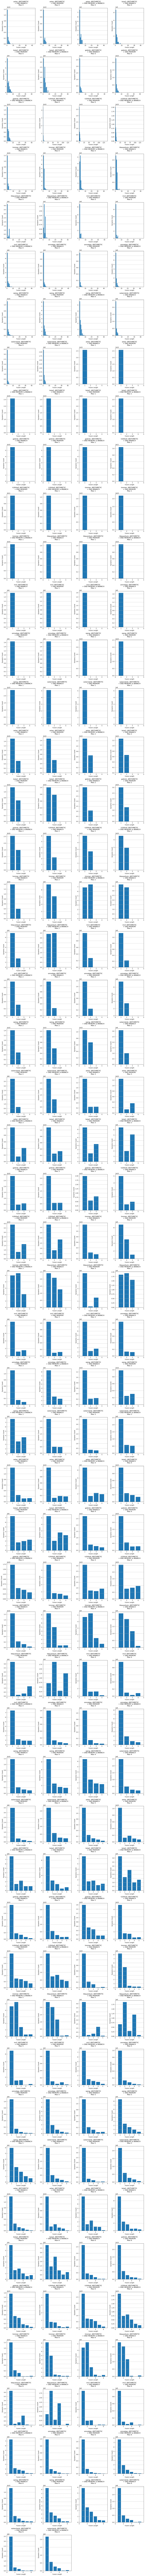

In [43]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    group_title = (
        f"{group_name[1]}: "
        f"{group_name[2]}\n"
        f"+ END {group_name[3]}\n"
        f"Max {group_name[0]}\n"
    )

    data = group_data.reset_index()
    axes[i].bar(data['fusion_length'], data['total_count'])
    axes[i].set_title(f'{group_title}')
    axes[i].set_xlabel('Fusion Length')
    axes[i].set_ylabel('Dynamic Count')
    axes[i].tick_params(axis='x')
    max_x = max(group_data['fusion_length'].max()+1, 5)
    axes[i].set_xlim(left=0, right=max_x)
    axes[i].grid(axis='y')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(img_path, dpi=150, bbox_inches='tight')
plt.show()